## Importación de las librerias necesarias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tqdm import tqdm
import sklearn.linear_model
import sklearn.metrics 

##Lectura de los datos

### Lectura datos 2022

In [ ]:
data2022 = pd.read_excel('drive/MyDrive/Proyecto2_CienciaDatos/2022.xlsx')

Partidos relevantes


In [ ]:
columns = ['DPTOS', 'PACTO HISTORICO', 'ALIANZA VERDE', 'CENTRO DEMOCRATICO',
       'NUEVO LIBERALISMO', 'MIRA JUSTA LIBRES', 'PL', 'PC', 'CR',
       'FUERZA CIUDADANA', 'LA U']

partidos2022 = columns[1:]
data2022.columns = columns

Se definen las categorías ideológicas de los partidos y el diccionario de ideología asociada al partido

In [ ]:
posMov = ['IZQUIERDA', 'CENTRO-IZQUIERDA', 'CENTRO', 'CENTRO-DERECHA', 'DERECHA']
posMov2022 = ['IZQUIERDA', 'CENTRO', 'CENTRO-DERECHA', 'CENTRO', 'DERECHA', 'CENTRO-DERECHA', 'CENTRO-DERECHA', 'CENTRO-DERECHA', 
              'CENTRO-IZQUIERDA', 'CENTRO']

pos2022 = {}

for i in range(len(partidos2022)):
  pos2022[partidos2022[i]] = posMov2022[i]

A partir de los datos iniciales se procede a crear el archivo *data2022.csv* con el conteo de votos totales por ideología para las elecciones al Senado de 2022.

In [ ]:
for movimiento in posMov:
  data2022[movimiento] = np.zeros(len(data2022))

In [ ]:
data2022 = data2022.set_index(['DPTOS'])

Se contabiliza total votos por partido y departamento


In [ ]:
for dpto in data2022.index:
  for part in partidos2022:
    data2022[pos2022[part]][dpto] = int(data2022[pos2022[part]][dpto]) + int(data2022[part][dpto])

In [ ]:
data2022 = data2022.drop(partidos2022, axis=1)

In [ ]:
data2022.to_csv('drive/MyDrive/Proyecto2_CienciaDatos/data2022.csv')

### Lectura datos 2018

Se carga los datos de elecciones al Senado 2018


In [ ]:
data = pd.read_csv('drive/MyDrive/Proyecto2_CienciaDatos/2018.csv')

Se agrupan los partidos e ideologías

In [ ]:
partidos = np.unique(data['partido'].dropna())

id_partido = ['IZQUIERDA', 'IZQUIERDA', 'DERECHA', 'CENTRO', 'DERECHA', 'IZQUIERDA', 'CENTRO-IZQUIERDA', 'IZQUIERDA', 
              'IZQUIERDA', 'CENTRO-IZQUIERDA', 'CENTRO-IZQUIERDA', 'CENTRO', 'DERECHA', 'CENTRO-DERECHA', 'CENTRO-DERECHA',
              'IZQUIERDA', 'CENTRO-DERECHA', 'DERECHA', 'CENTRO-IZQUIERDA', 'DERECHA', 'CENTRO-DERECHA', 'DERECHA', 'IZQUIERDA']

pos = {}
for i in range(len(partidos)):
  pos[partidos[i]] = id_partido[i] 

pos[(np.array(data['partido']))[0]] = (np.array(data['partido']))[0]        

In [ ]:
data['pos'] = [pos[x] for x in data['partido']]

Se filtran grupos irrelevantes


In [ ]:
data2018 = data.drop(['ZZ', 'PP', 'mesa'], axis=1)
data2018 = data2018.groupby(['NDepto', 'pos']).sum()

Se toma a Chocó como ejemplo de condensar estos datos

In [ ]:
data2018.loc['CHOCO'].sort_values(by='votos', ascending=False)

,votos
pos,
CENTRO-DERECHA,73170
DERECHA,23995
IZQUIERDA,11102
CENTRO,9855
CENTRO-IZQUIERDA,2895


Y finalmente, se guarda en un archivo csv


In [ ]:
data2018.to_csv('drive/MyDrive/Proyecto2_CienciaDatos/data2018.csv')

### Lectura datos 2014

Cargar datos de elecciones al Senado 2014, el código cambió debido a que los datos estaban separados en un archivo para cada departamento



In [ ]:
from glob import glob

excel_files = glob('drive/MyDrive/Proyecto2_CienciaDatos/Senado2014/*')

In [ ]:
data = pd.read_excel(excel_files[0])


for i in tqdm(range(1,len(excel_files))):
  i_data = pd.read_excel(excel_files[i]) 
  data = pd.concat([data, i_data])

Filtramos los campos erróneos y agrupamos nuevamente los partidos con sus ideologías

In [ ]:
partidos2014 = np.unique(data['NOMBRE_PARTIDO'].dropna())

id_partidos2014 = [np.nan, 'IZQUIERDA', 'IZQUIERDA', 'IZQUIERDA', 'IZQUIERDA', 'IZQUIERDA', 'CENTRO-DERECHA', 'IZQUIERDA', 'IZQUIERDA', 'IZQUIERDA', 
              'DERECHA', 'IZQUIERDA', 'CENTRO-IZQUIERDA', 'IZQUIERDA', 'CENTRO-IZQUIERDA', 'CENTRO-IZQUIERDA', 'CENTRO',
              'CENTRO-DERECHA', 'CENTRO-DERECHA', 'CENTRO-DERECHA', 'CENTRO-DERECHA', 'DERECHA', 'IZQUIERDA', 'IZQUIERDA', 'IZQUIERDA', 'IZQUIERDA',
              'IZQUIERDA', 'IZQUIERDA', 'IZQUIERDA', 'CENTRO-DERECHA', 'IZQUIERDA', 'IZQUIERDA', 'IZQUIERDA', 'IZQUIERDA', 'IZQUIERDA', 'DERECHA',
              'IZQUIERDA', 'IZQUIERDA', 'CENTRO-IZQUIERDA', 'CENTRO', 'CENTRO-DERECHA', 'CENTRO-DERECHA', 'CENTRO-DERECHA', 'CENTRO-DERECHA', 'DERECHA', 'IZQUIERDA',
              'IZQUIERDA']

pos2014 = {}
for i in range(len(partidos2014)):
  pos2014[partidos2014[i]] = id_partidos2014[i] 
pos2014[np.nan] = np.nan

In [ ]:
data['pos'] = [pos2014[x] for x in data['NOMBRE_PARTIDO']]

Se contabiliza ahora el total votos por ideología y departamento

In [ ]:
data2014 = data.groupby(['DEPARTAMENTO', 'pos']).sum()
data2014 = data2014[['COD_CAND','VOTACION']]
data2014 = data2014.drop(['COD_CAND'], axis=1)
data2014['votos'] = data2014['VOTACION']
data2014 = data2014.drop(['VOTACION'], axis=1)

Y en este caso se pone al Valle de ejemplo

In [ ]:
data2014.loc['VALLE'].sort_values(by=['votos'], ascending=False)

,votos
pos,
CENTRO-DERECHA,709522
DERECHA,110645
IZQUIERDA,68850
CENTRO,66957
CENTRO-IZQUIERDA,3252


Y se guarda en archivo csv


In [ ]:
data2014.to_csv('drive/MyDrive/Proyecto2_CienciaDatos/data2014.csv')

### Lectura datos 2010

Se carga los datos de elecciones Senado 2010


In [ ]:
data = pd.read_excel('drive/MyDrive/Proyecto2_CienciaDatos/2010.xlsx')

Se estandarizan los nombres de departamento para variables de texto y se arreglan los NaN


In [ ]:
data['Departamento'] = [str(x).upper().replace('Á', 'A').replace('Ó', 'O').replace('É', 'E').replace('Í', 'I').strip() for x in data['Departamento']]
data = data.dropna()
data = data.drop(['MAL', 'otros'], axis=1)

Partidos presentes en las elecciones de 2010


In [ ]:
partidos2010 = data.columns[1:-1]

Se define las categorías ideológicas según partido en las elecciones 2010


In [ ]:
posMov = ['IZQUIERDA', 'CENTRO-IZQUIERDA', 'CENTRO', 'CENTRO-DERECHA', 'DERECHA']
posMov2010 = ['CENTRO-DERECHA', 'CENTRO-DERECHA', 'CENTRO-DERECHA', 'CENTRO-DERECHA', 'DERECHA', 'IZQUIERDA', 'DERECHA', 'CENTRO', 
              'DERECHA', 'CENTRO-IZQUIERDA', ]
pos2010 = {}

for i in range(len(partidos2010)):
  pos2010[partidos2010[i]] = posMov2010[i]

In [ ]:
for movimiento in posMov:
  data[movimiento] = np.zeros(len(data))

In [ ]:
data = data.set_index(['Departamento'])

Y se contabiliza el total votos por ideología y departamento

In [ ]:
for dpto in data.index:
  for part in partidos2010:
    try:
      data[pos2010[part]][dpto] = int(data[pos2010[part]][dpto]) + int(data[part][dpto])
    except:
      pass

In [ ]:
data = data.drop(partidos2010, axis=1)

In [ ]:
data = data.drop(['Total'], axis=1)

In [ ]:
data['DPTOS'] = ['ANTIOQUIA', 'CORDOBA', 'SANTANDER', 'BOGOTA',
       'VALLE DEL CAUCA', 'CAUCA', 'ATLANTICO', 'CUNDINAMARCA',
       'NORTE DE SANTANDER', 'TOLIMA', 'NARIÑO', 'RISARALDA', 'LA GUAJIRA',
       'CALDAS', 'BOYACA', 'META', 'MAGDALENA', 'QUINDIO', 'CESAR', 'CHOCO',
       'BOLIVAR', 'PUTUMAYO', 'CAQUETA', 'CASANARE', 'SUCRE',
       'SAN ANDRES Y PROVIDENCIA', 'AMAZONAS', 'CONSULADOS', 'VICHADA',
       'VAUPES', 'GUAINIA', 'ARAUCA', 'GUAVIARE', 'HUILA', 'TOTAL']

data2010 = data.set_index(['DPTOS'])

Y se guarda en un archivo csv

In [ ]:
data2010.to_csv('drive/MyDrive/Proyecto2_CienciaDatos/data2010.csv')

## Normalización de los votos y creación de las matrices

El análisis de favorabilidad de las ideologías se realizará mediante variables cuantitativas y en lo posible intensivas por departamento. Por esta razón, se normalizarán los conjuntos de votos por ideología para decidir la favorabilidad en las votaciones por departamento a partir de una votación mínima $0\leq p\leq 1$. Esto permitirá un umbral a discreción para la decisión de la clasificación previa $0$ (poco favorable) y $1$ (altamente favorable) como entrenamiento de la regresión logística, usando los datos de 2010-2018 y posterior validación con los datos de 2022.

### Normalización 2022

In [ ]:
dat2022 = pd.read_csv('drive/MyDrive/Proyecto2_CienciaDatos/data2022.csv')

In [ ]:
dat2022 = dat2022.set_index(['DPTOS'])

Se hace una división por el total de votos


In [ ]:
for dpto in data2022.index:
  total = np.sum(dat2022.loc[dpto])
  for part in dat2022.columns:
    dat2022.loc[dpto][part] = dat2022.loc[dpto][part]/total 

Se guarda en csv

In [ ]:
dat2022.to_csv('drive/MyDrive/Proyecto2_CienciaDatos/dataNorm2022.csv')

### Normalización 2018

In [ ]:
dat2018 = pd.read_csv('drive/MyDrive/Proyecto2_CienciaDatos/data2018.csv')
dat2018 = dat2018.groupby(['NDepto', 'pos']).sum()

In [ ]:
indice = ['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLANTICO', 'BOGOTA',
       'BOLIVAR', 'BOYACA', 'CALDAS', 'CAQUETA', 'CASANARE', 'CAUCA',
       'CESAR', 'CHOCO', 'CORDOBA', 'CUNDINAMARCA', 'GUAINIA', 'GUAVIARE',
       'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO',
       'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA', 'SAN ANDRES Y PROVIDENCIA',
       'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE', 'VAUPES', 'VICHADA', 'TOTAL']

columnas = ['IZQUIERDA', 'CENTRO-IZQUIERDA', 'CENTRO', 'CENTRO-DERECHA', 'DERECHA']

In [ ]:
dataNorm2018 = pd.DataFrame(indice)
dataNorm2018.columns = ['DPTOS']

In [ ]:
for columna in columnas:
  dataNorm2018[columna] = np.zeros(len(dataNorm2018))

In [ ]:
dataNorm2018 = dataNorm2018.set_index(['DPTOS'])

In [ ]:
for ind in indice[:-1]:
  for mov in columnas:
    if ind == 'BOGOTA':
      dataNorm2018.loc[ind][mov] = dat2018.loc['BOGOTA D.C.'].loc[mov]
    elif ind == 'SAN ANDRES Y PROVIDENCIA':
      dataNorm2018.loc[ind][mov] = dat2018.loc['SAN ANDRES'].loc[mov]
    elif ind == 'NORTE DE SANTANDER':
      dataNorm2018.loc[ind][mov] = dat2018.loc['NORTE DE SAN'].loc[mov]
    elif ind == 'CESAR':
      pass
    else:  
      dataNorm2018.loc[ind][mov] = dat2018.loc[ind].loc[mov]

In [ ]:
for mov in columnas:
  dataNorm2018.loc['TOTAL'][mov] = np.sum(dataNorm2018[mov])

Se hace una división por el total de votos


In [ ]:
for dpto in indice:
  total = np.sum(dataNorm2018.loc[dpto])
  for part in columnas:
    dataNorm2018.loc[dpto][part] = dataNorm2018.loc[dpto][part]/total 

Se guarda en csv

In [ ]:
dataNorm2018.to_csv('drive/MyDrive/Proyecto2_CienciaDatos/dataNorm2018.csv')

### Normalización 2014

In [ ]:
dat2014 = pd.read_csv('drive/MyDrive/Proyecto2_CienciaDatos/data2014.csv')
dat2014 = dat2014.groupby(['DEPARTAMENTO', 'pos']).sum()

In [ ]:
indice = ['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLANTICO', 'BOGOTA',
       'BOLIVAR', 'BOYACA', 'CALDAS', 'CAQUETA', 'CASANARE', 'CAUCA',
       'CESAR', 'CHOCO', 'CORDOBA', 'CUNDINAMARCA', 'GUAINIA', 'GUAVIARE',
       'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO',
       'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA', 'SAN ANDRES Y PROVIDENCIA',
       'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE', 'VAUPES', 'VICHADA', 'TOTAL']

columnas = ['IZQUIERDA', 'CENTRO-IZQUIERDA', 'CENTRO', 'CENTRO-DERECHA', 'DERECHA']

In [ ]:
dataNorm2014 = pd.DataFrame(indice)
dataNorm2014.columns = ['DPTOS']

In [ ]:
for columna in columnas:
  dataNorm2014[columna] = np.zeros(len(dataNorm2014))

In [ ]:
dataNorm2014 = dataNorm2014.set_index(['DPTOS'])

In [ ]:
for ind in indice[:-1]:
  for mov in columnas:
    if ind == 'BOGOTA':
      dataNorm2014.loc[ind][mov] = dat2014.loc['BOGOTA D.C.'].loc[mov]
    elif ind == 'SAN ANDRES Y PROVIDENCIA':
      dataNorm2014.loc[ind][mov] = dat2014.loc['SAN ANDRES'].loc[mov]
    elif ind == 'NORTE DE SANTANDER':
      dataNorm2014.loc[ind][mov] = dat2014.loc['NORTE DE SAN'].loc[mov]
    else:
      dataNorm2014.loc[ind][mov] = dat2014.loc[ind].loc[mov]

In [ ]:
for mov in columnas:
  dataNorm2014.loc['TOTAL'][mov] = np.sum(dataNorm2014[mov])

Se hace una división por el total de votos


In [ ]:
for dpto in indice:
  total = np.sum(dataNorm2014.loc[dpto])
  for part in columnas:
    dataNorm2014.loc[dpto][part] = dataNorm2014.loc[dpto][part]/total 

Se guarda en csv

In [ ]:
dataNorm2014.to_csv('drive/MyDrive/Proyecto2_CienciaDatos/dataNorm2014.csv')

### Normalización 2010

In [ ]:
dat2010 = pd.read_csv('drive/MyDrive/Proyecto2_CienciaDatos/data2010.csv')

In [ ]:
dat2010 = dat2010.set_index(['DPTOS'])

Se hace una división por el total de votos


In [ ]:
for dpto in data.index:
  total = np.sum(dat2010.loc[dpto])
  for part in dat2010.columns:
    dat2010.loc[dpto][part] = dat2010.loc[dpto][part]/total 

Se guarda en csv

In [ ]:
dat2010.to_csv('drive/MyDrive/Proyecto2_CienciaDatos/dataNorm2010.csv')

## Creación de los modelos

In [ ]:
matrix2010 = pd.read_csv('dataNorm2010.csv')
matrix2014 = pd.read_csv('dataNorm2014.csv')
matrix2018 = pd.read_csv('dataNorm2018.csv')
matrix2022 = pd.read_csv('dataNorm2022.csv')

datosFinales = pd.read_excel('datosFinales.xlsx')

Se define la favorabilidad mínima en votación para la decisión de 1 en la clasificación logística. Si es menor, 0

In [ ]:
p = 0.15

In [ ]:
matrix2010 = matrix2010.set_index(['DPTOS'])
matrix2014 = matrix2014.set_index(['DPTOS'])
matrix2018 = matrix2018.set_index(['DPTOS'])
matrix2022 = matrix2022.set_index(['DPTOS'])

datosFinales = datosFinales.set_index(['DPTOS'])

In [ ]:
for dpto in matrix2010.index:
  for mov in matrix2010.columns:
    matrix2010.loc[dpto][mov] = 1 if matrix2010.loc[dpto][mov] > p else 0 
    matrix2014.loc[dpto][mov] = 1 if matrix2014.loc[dpto][mov] > p else 0 
    matrix2018.loc[dpto][mov] = 1 if matrix2018.loc[dpto][mov] > p else 0 
    matrix2022.loc[dpto][mov] = 1 if matrix2022.loc[dpto][mov] > p else 0 

Filtrar departamentos sin indicadores socioeconómicos

In [ ]:
matrix2022 = matrix2022.drop(['GUAINIA', 'VAUPES', 'VICHADA', 'TOTAL'])
matrix2018 = matrix2018.drop(['GUAINIA', 'VAUPES', 'VICHADA', 'TOTAL'])
matrix2014 = matrix2014.drop(['GUAINIA', 'VAUPES', 'VICHADA', 'TOTAL'])
matrix2010 = matrix2010.drop(['GUAINIA', 'VAUPES', 'VICHADA', 'TOTAL'])

datosFinales = datosFinales.drop(['GUAINIA', 'VAUPES', 'VICHADA'])

In [ ]:
datos2010 = datosFinales[['CoberturaSuperior2009', 'RiesgoElectoral2009', 'FortalezaEconomica2009',
                          'Infraestructura2009', 'CapitalHumano2009']]

datos2014 = datosFinales[['CoberturaSuperior2013', 'RiesgoElectoral2013', 'FortalezaEconomica2013',
                          'Infraestructura2013', 'CapitalHumano2013']]

datos2018 = datosFinales[['CoberturaSuperior2017', 'RiesgoElectoral2017', 'FortalezaEconomica2017',
                          'Infraestructura2017', 'CapitalHumano2017']]

datos2022 = datosFinales[['CoberturaSuperior2021', 'RiesgoElectoral2021', 'FortalezaEconomica2021',
                          'Infraestructura2021', 'CapitalHumano2021']]


In [ ]:
datos2010.columns = ['CoberturaSuperior', 'RiesgoElectoral', 'FortalezaEconomica',
                          'Infraestructura', 'CapitalHumano']
datos2014.columns = ['CoberturaSuperior', 'RiesgoElectoral', 'FortalezaEconomica',
                          'Infraestructura', 'CapitalHumano']
datos2018.columns = ['CoberturaSuperior', 'RiesgoElectoral', 'FortalezaEconomica',
                          'Infraestructura', 'CapitalHumano']
datos2022.columns = ['CoberturaSuperior', 'RiesgoElectoral', 'FortalezaEconomica',
                          'Infraestructura', 'CapitalHumano']

Y se añaden a cada DataFrame la columna de presencia de la ideología para cada una de las ideologías.

In [ ]:
dataYears = [datos2010, datos2014, datos2018]
matrixYears = [matrix2010, matrix2014, matrix2018]

for i in range(len(dataYears)):
  dataYear = dataYears[i].copy()
  dataYear['izq'] = np.zeros(len(dataYear))

  for dpto in dataYear.index:
    dataYear.loc[dpto]['izq'] = matrixYears[i].loc[dpto]['IZQUIERDA']

  if i == 0:
    dataIzq = dataYear
  else:
    dataIzq = pd.concat([dataIzq, dataYear])

for i in range(len(dataYears)):
  dataYear = dataYears[i].copy()
  dataYear['centIzq'] = np.zeros(len(dataYear))

  for dpto in dataYear.index:
    dataYear.loc[dpto]['centIzq'] = matrixYears[i].loc[dpto]['CENTRO-IZQUIERDA']

  if i == 0:
    dataCentIzq = dataYear
  else:
    dataCentIzq = pd.concat([dataCentIzq, dataYear])

for i in range(len(dataYears)):
  dataYear = dataYears[i].copy()
  dataYear['cent'] = np.zeros(len(dataYear))

  for dpto in dataYear.index:
    dataYear.loc[dpto]['cent'] = matrixYears[i].loc[dpto]['CENTRO']

  if i == 0:
    dataCent = dataYear
  else:
    dataCent = pd.concat([dataCent, dataYear])

for i in range(len(dataYears)):
  dataYear = dataYears[i].copy()
  dataYear['centDer'] = np.zeros(len(dataYear))

  for dpto in dataYear.index:
    dataYear.loc[dpto]['centDer'] = matrixYears[i].loc[dpto]['CENTRO-DERECHA']

  if i == 0:
    dataCentDer = dataYear
  else:
    dataCentDer = pd.concat([dataCentDer, dataYear])

for i in range(len(dataYears)):
  dataYear = dataYears[i].copy()
  dataYear['der'] = np.zeros(len(dataYear))

  for dpto in dataYear.index:
    dataYear.loc[dpto]['der'] = matrixYears[i].loc[dpto]['DERECHA']

  if i == 0:
    dataDer = dataYear
  else:
    dataDer = pd.concat([dataDer, dataYear])

Se arregla el modelo de la ideología 'Centro Derecha' pues en los datos de entrenamiento sólo hay una clase (1 - Presencia de la ideología), así que se genera un departamento imaginario cuyos parámetros son el promedio de todos los anteriores y que no cuenta con la presencia de esta ideología.

In [ ]:
indices = ['CoberturaSuperior',	'RiesgoElectoral',	'FortalezaEconomica',	'Infraestructura',	'CapitalHumano']

dataCentDerFixed = pd.DataFrame(['IMAGINOLANDIA'])
for indice in indices:
  dataCentDerFixed[indice] = np.mean(dataCentDer[indice])

dataCentDerFixed['centDer'] = 0
dataCentDerFixed.columns = ['DPTOS', 'CoberturaSuperior', 'RiesgoElectoral', 'FortalezaEconomica', 'Infraestructura', 
                            'CapitalHumano', 'centDer']

dataCentDerFixed.set_index(['DPTOS'], inplace=True)

dataCentDer = pd.concat([dataCentDer, dataCentDerFixed])

Ahora, se crean los X y Y de entrenamiento para cada uno de los 5 modelos.

In [ ]:
X = dataIzq[['CoberturaSuperior',	'RiesgoElectoral',	'FortalezaEconomica',	'Infraestructura',	'CapitalHumano']]
XCentDer = dataCentDer[['CoberturaSuperior',	'RiesgoElectoral',	'FortalezaEconomica',	'Infraestructura',	'CapitalHumano']]

YIzq = dataIzq['izq']
YCentIzq = dataCentIzq['centIzq']
YCent = dataCent['cent']
YCentDer = dataCentDer['centDer']
YDer = dataDer['der']

Finalmente, definimos los modelos utilizando la libreria SkLearn 

In [ ]:
modelIzq = sklearn.linear_model.LogisticRegression().fit(X, YIzq)
modelCentIzq = sklearn.linear_model.LogisticRegression().fit(X, YCentIzq)
modelCent = sklearn.linear_model.LogisticRegression().fit(X, YCent)
modelCentDer = sklearn.linear_model.LogisticRegression().fit(XCentDer, YCentDer)
modelDer = sklearn.linear_model.LogisticRegression().fit(X, YDer)

Se predice la lista de favorabilidad de departamentos para cada ideología

In [ ]:
YIzqPredict = modelIzq.predict(datos2022)
YCentIzqPredict = modelCentIzq.predict(datos2022)
YCentPredict = modelCent.predict(datos2022)
YCentDerPredict = modelCentDer.predict(datos2022)
YDerPredict = modelDer.predict(datos2022)

In [ ]:
print('YIzqPredict: ', YIzqPredict)
print('YCentIzqPredict: ', YCentIzqPredict)
print('YCentPredict: ', YCentPredict)
print('YCentDerPredict: ', YCentDerPredict)
print('YDerPredict: ', YDerPredict)
print(matrix2010)

Y las probabilidades

In [ ]:
probaIzq = modelIzq.predict_proba(datos2022)
probaCentIzq = modelCentIzq.predict_proba(datos2022)
probaCent = modelCent.predict_proba(datos2022)
probaDer = modelCentDer.predict_proba(datos2022)
probaCentDer = modelDer.predict_proba(datos2022)

## Gráficas y Análisis de resultados

En primer lugar, se calculan los F1_Scores, dos para cada modelo (según si el departamento hace o no parte de esa ideología), lo que resulta en 10 indicadores

In [ ]:
f1Izq0 = sklearn.metrics.f1_score(matrix2022['IZQUIERDA'], YIzqPredict, pos_label=0)
f1CentIzq0 = sklearn.metrics.f1_score(matrix2022['CENTRO-IZQUIERDA'], YCentIzqPredict, pos_label=0)
f1Cent0 = sklearn.metrics.f1_score(matrix2022['CENTRO'], YCentPredict, pos_label=0)
f1CentDer0 = sklearn.metrics.f1_score(matrix2022['CENTRO-DERECHA'], YCentDerPredict, pos_label=0)
f1Der0 = sklearn.metrics.f1_score(matrix2022['DERECHA'], YDerPredict, pos_label=0)

f1Izq1 = sklearn.metrics.f1_score(matrix2022['IZQUIERDA'], YIzqPredict, pos_label=1)
f1CentIzq1 = sklearn.metrics.f1_score(matrix2022['CENTRO-IZQUIERDA'], YCentIzqPredict, pos_label=1)
f1Cent1 = sklearn.metrics.f1_score(matrix2022['CENTRO'], YCentPredict,pos_label=1)
f1CentDer1 = sklearn.metrics.f1_score(matrix2022['CENTRO-DERECHA'], YCentDerPredict, pos_label=1)
f1Der1 = sklearn.metrics.f1_score(matrix2022['DERECHA'], YDerPredict, pos_label=1)

Y se tabulan para su visualización

In [ ]:
f1Table = pd.DataFrame(['F1_Score_0', 'F1_Score_1'], columns=['Score'])
f1Table['IZQUIERDA'] = [f1Izq0, f1Izq1]
f1Table['CENTRO-IZQUIERDA'] = [f1CentIzq0, f1CentIzq1]
f1Table['CENTRO'] = [f1Cent0, f1Cent1]
f1Table['CENTRO-DERECHA'] = [f1CentDer0, f1CentDer1]
f1Table['DERECHA'] = [f1Der0, f1Der1]

f1Table.set_index(['Score'], inplace=True)
f1Table                

,IZQUIERDA,CENTRO-IZQUIERDA,CENTRO,CENTRO-DERECHA,DERECHA
Score,,,,,
F1_Score_0,0.846154,0.965517,0.40,0.0,0.125
F1_Score_1,0.000000,0.000000,0.16,1.0,0.000


Ahora se observará la utilidad del cálculo de la probabilidad de las predicciones, y el cambio en la precisión a medida que se varía el límite de esta probabilidad y se predice el binario

In [ ]:
n_probas = 100
probas_cut_alto = np.linspace(0.0,1.0,n_probas)
precision_probas = np.ones(n_probas)
recall_probas = np.ones(n_probas)
f1_probas = np.ones(n_probas)

for i in range(n_probas):
    ii = probaIzq[:,0] > probas_cut_alto[i]
    YIzqPredict[ii] = 0
    YIzqPredict[~ii] = 1
    precision_probas[i] = sklearn.metrics.precision_score(matrix2022['IZQUIERDA'], YIzqPredict, pos_label=0)
    recall_probas[i] = sklearn.metrics.recall_score(matrix2022['IZQUIERDA'], YIzqPredict, pos_label=0)
    f1_probas[i] = sklearn.metrics.f1_score(matrix2022['IZQUIERDA'], YIzqPredict, pos_label=0)

plt.plot(recall_probas, precision_probas, '-o', c='red', label='Izquierda')

n_probas = 100
probas_cut_alto = np.linspace(0.0,1.0,n_probas)
precision_probas = np.ones(n_probas)
recall_probas = np.ones(n_probas)
f1_probas = np.ones(n_probas)

for i in range(n_probas):
    ii = probaCentIzq[:,0] > probas_cut_alto[i]
    YCentIzqPredict[ii] = 0
    YCentIzqPredict[~ii] = 1
    precision_probas[i] = sklearn.metrics.precision_score(matrix2022['CENTRO-IZQUIERDA'], YCentIzqPredict, pos_label=0)
    recall_probas[i] = sklearn.metrics.recall_score(matrix2022['CENTRO-IZQUIERDA'], YCentIzqPredict, pos_label=0)
    f1_probas[i] = sklearn.metrics.f1_score(matrix2022['CENTRO-IZQUIERDA'], YCentIzqPredict, pos_label=0)

plt.plot(recall_probas, precision_probas, '-o', c='orange', label='Centro Izquierda')

n_probas = 100
probas_cut_alto = np.linspace(0.0,1.0,n_probas)
precision_probas = np.ones(n_probas)
recall_probas = np.ones(n_probas)
f1_probas = np.ones(n_probas)

for i in range(n_probas):
    ii = probaCent[:,0] > probas_cut_alto[i]
    YCentPredict[ii] = 0
    YCentPredict[~ii] = 1
    precision_probas[i] = sklearn.metrics.precision_score(matrix2022['CENTRO'], YCentPredict, pos_label=0)
    recall_probas[i] = sklearn.metrics.recall_score(matrix2022['CENTRO'], YCentPredict, pos_label=0)
    f1_probas[i] = sklearn.metrics.f1_score(matrix2022['CENTRO'], YCentPredict, pos_label=0)

plt.plot(recall_probas, precision_probas, '-o', c='green', label='Centro')

n_probas = 100
probas_cut_alto = np.linspace(0.0,1.0,n_probas)
precision_probas = np.ones(n_probas)
recall_probas = np.ones(n_probas)
f1_probas = np.ones(n_probas)

for i in range(n_probas):
    ii = probaCentDer[:,0] > probas_cut_alto[i]
    YCentIzqPredict[ii] = 0
    YCentIzqPredict[~ii] = 1
    precision_probas[i] = sklearn.metrics.precision_score(matrix2022['CENTRO-DERECHA'], YCentDerPredict, pos_label=0)
    recall_probas[i] = sklearn.metrics.recall_score(matrix2022['CENTRO-DERECHA'], YCentDerPredict, pos_label=0)
    f1_probas[i] = sklearn.metrics.f1_score(matrix2022['CENTRO-DERECHA'], YCentDerPredict, pos_label=0)

plt.plot(recall_probas, precision_probas, '-o', c='cyan', label='Centro Derecha')

n_probas = 100
probas_cut_alto = np.linspace(0.0,1.0,n_probas)
precision_probas = np.ones(n_probas)
recall_probas = np.ones(n_probas)
f1_probas = np.ones(n_probas)

for i in range(n_probas):
    ii = probaDer[:,0] > probas_cut_alto[i]
    YDerPredict[ii] = 0
    YDerPredict[~ii] = 1
    precision_probas[i] = sklearn.metrics.precision_score(matrix2022['DERECHA'], YDerPredict, pos_label=0)
    recall_probas[i] = sklearn.metrics.recall_score(matrix2022['DERECHA'], YDerPredict, pos_label=0)
    f1_probas[i] = sklearn.metrics.f1_score(matrix2022['DERECHA'], YDerPredict, pos_label=0)

plt.plot(recall_probas, precision_probas, '-o', c='blue', label='Derecha')

plt.grid()
plt.legend()
plt.xlabel('Límite de probabilidad')
plt.ylabel('Precisión')

Se define ahora la función que se utilizará para crear las matrices de confusión

In [ ]:
def CM(Y_true, Y_pred, classes):
  fig = plt.figure(figsize=(10, 10))
  cm = sklearn.metrics.confusion_matrix(Y_true, Y_pred)
  lclasses = np.arange(0,classes)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cmap=plt.cm.Blues
  ax = fig.add_subplot(1,1,1)
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.86)
  ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=lclasses, yticklabels=lclasses)
  ax.set_xlabel("Predicted",size=20)
  ax.set_ylabel("True",size=20)
  ax.set_ylim(classes-0.5, -0.5)

  plt.setp(ax.get_xticklabels(), size=12)
  plt.setp(ax.get_yticklabels(), size=12)

  fmt = '.2f'
  thresh = cm.max()/2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=15 , color="white" if cm[i, j] > thresh else "black")

  return fig

Y se crean 5 matrices, una para cada modelo para cada ideología

In [ ]:
CM(matrix2022['IZQUIERDA'], YIzqPredict, 2).savefig('drive/MyDrive/Proyecto2_CienciaDatos/images/CMIzq.svg', dpi=200)
CM(matrix2022['CENTRO-IZQUIERDA'], YCentIzqPredict, 2).savefig('drive/MyDrive/Proyecto2_CienciaDatos/images/CMCentIzq.svg', dpi=200)
CM(matrix2022['CENTRO'], YCentPredict, 2).savefig('drive/MyDrive/Proyecto2_CienciaDatos/images/CMCent.svg', dpi=200)
CM(matrix2022['CENTRO-DERECHA'], YCentDerPredict, 2).savefig('drive/MyDrive/Proyecto2_CienciaDatos/images/CMCentDer.svg', dpi=200)
CM(matrix2022['DERECHA'], YDerPredict, 2).savefig('drive/MyDrive/Proyecto2_CienciaDatos/images/CMDer.svg', dpi=200)

Se hace ahora un histograma que muestra la evolución del indicador en general y en el país y a través de los años

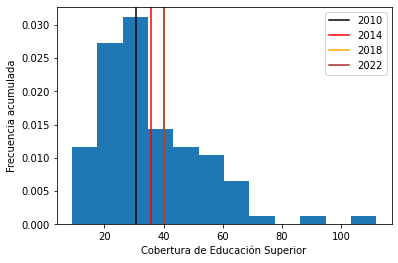

In [ ]:
plt.hist(X['CoberturaSuperior'], bins=12, density=True)
plt.axvline(x=np.mean(datos2010['CoberturaSuperior']), c='k', label='2010')
plt.axvline(x=np.mean(datos2014['CoberturaSuperior']), c='r', label='2014')
plt.axvline(x=np.mean(datos2018['CoberturaSuperior']), c='orange', label='2018')
plt.axvline(x=np.mean(datos2022['CoberturaSuperior']), c='brown', label='2022')

plt.legend()
plt.xlabel('Cobertura de Educación Superior')
plt.ylabel('Frecuencia acumulada')
plt.savefig('drive/MyDrive/Proyecto2_CienciaDatos/images/HistCoverturaSuperior.svg', dpi=200)

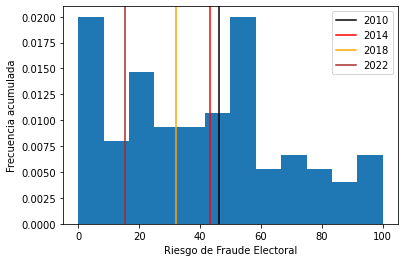

In [ ]:
plt.hist(X['RiesgoElectoral'], bins=12, density=True)
plt.axvline(x=np.mean(datos2010['RiesgoElectoral']), c='k', label='2010')
plt.axvline(x=np.mean(datos2014['RiesgoElectoral']), c='r', label='2014')
plt.axvline(x=np.mean(datos2018['RiesgoElectoral']), c='orange', label='2018')
plt.axvline(x=np.mean(datos2022['RiesgoElectoral']), c='brown', label='2022')

plt.legend()
plt.xlabel('Riesgo de Violencia Electoral')
plt.ylabel('Frecuencia acumulada')
plt.savefig('drive/MyDrive/Proyecto2_CienciaDatos/images/HistRiesgoElectoral.svg', dpi=200)

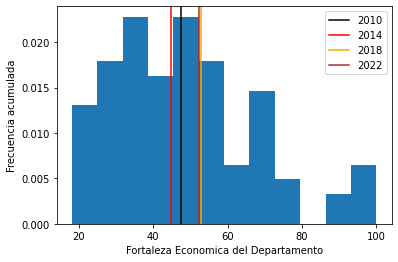

In [ ]:
plt.hist(X['FortalezaEconomica'], bins=12, density=True)
plt.axvline(x=np.mean(datos2010['FortalezaEconomica']), c='k', label='2010')
plt.axvline(x=np.mean(datos2014['FortalezaEconomica']), c='r', label='2014')
plt.axvline(x=np.mean(datos2018['FortalezaEconomica']), c='orange', label='2018')
plt.axvline(x=np.mean(datos2022['FortalezaEconomica']), c='brown', label='2022')

plt.legend()
plt.xlabel('Fortaleza Economica del Departamento')
plt.ylabel('Frecuencia acumulada')
plt.savefig('drive/MyDrive/Proyecto2_CienciaDatos/images/HistFortalezaEconomica.svg', dpi=200)

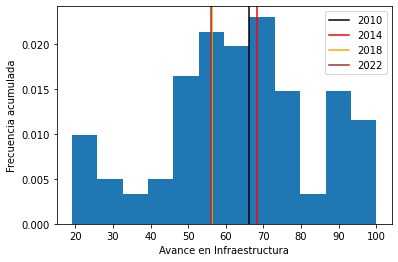

In [ ]:
plt.hist(X['Infraestructura'], bins=12, density=True)
plt.axvline(x=np.mean(datos2010['Infraestructura']), c='k', label='2010')
plt.axvline(x=np.mean(datos2014['Infraestructura']), c='r', label='2014')
plt.axvline(x=np.mean(datos2018['Infraestructura']), c='orange', label='2018')
plt.axvline(x=np.mean(datos2022['Infraestructura']), c='brown', label='2022')

plt.legend()
plt.xlabel('Avance en Infraestructura')
plt.ylabel('Frecuencia acumulada')
plt.savefig('drive/MyDrive/Proyecto2_CienciaDatos/images/HistInfraestructura.svg', dpi=200)

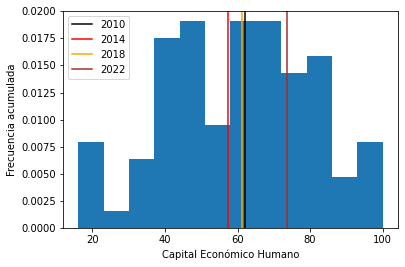

In [ ]:
plt.hist(X['CapitalHumano'], bins=12, density=True)
plt.axvline(x=np.mean(datos2010['CapitalHumano']), c='k', label='2010')
plt.axvline(x=np.mean(datos2014['CapitalHumano']), c='r', label='2014')
plt.axvline(x=np.mean(datos2018['CapitalHumano']), c='orange', label='2018')
plt.axvline(x=np.mean(datos2022['CapitalHumano']), c='brown', label='2022')

plt.legend()
plt.xlabel('Capital Económico Humano')
plt.ylabel('Frecuencia acumulada')
plt.savefig('drive/MyDrive/Proyecto2_CienciaDatos/images/HistCapitalHumano.svg', dpi=200)

In [ ]:
matrix2010 = pd.read_csv('drive/MyDrive/Proyecto2_CienciaDatos/dataNorm2010.csv')
matrix2014 = pd.read_csv('drive/MyDrive/Proyecto2_CienciaDatos/dataNorm2014.csv')
matrix2018 = pd.read_csv('drive/MyDrive/Proyecto2_CienciaDatos/dataNorm2018.csv')
matrix2022 = pd.read_csv('drive/MyDrive/Proyecto2_CienciaDatos/dataNorm2022.csv')

matrix2010 = matrix2010.set_index(['DPTOS'])
matrix2014 = matrix2014.set_index(['DPTOS'])
matrix2018 = matrix2018.set_index(['DPTOS'])
matrix2022 = matrix2022.set_index(['DPTOS'])

matrixTotal = pd.concat([matrix2010.loc[['TOTAL']], matrix2014.loc[['TOTAL']],
                         matrix2018.loc[['TOTAL']], matrix2022.loc[['TOTAL']]], axis=0)

Mostramos ahora la trayectoria de cada ideología en el país a través de las 4 elecciones

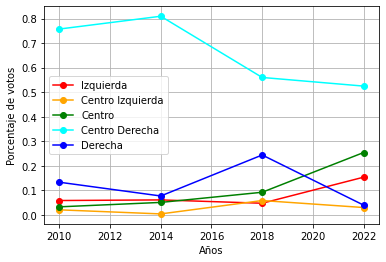

In [ ]:
years = [2010,2014,2018,2022]

plt.plot(years, matrixTotal['IZQUIERDA'], '-o', c='red', label='Izquierda')
plt.plot(years, matrixTotal['CENTRO-IZQUIERDA'], '-o', c='orange', label='Centro Izquierda')
plt.plot(years, matrixTotal['CENTRO'], '-o', c='green', label='Centro')
plt.plot(years, matrixTotal['CENTRO-DERECHA'], '-o', c='cyan', label='Centro Derecha')
plt.plot(years, matrixTotal['DERECHA'], '-o', c='blue', label='Derecha')

plt.grid()
plt.legend()
plt.xlabel('Años')
plt.ylabel('Porcentaje de votos')
plt.savefig('drive/MyDrive/Proyecto2_CienciaDatos/images/YearsVsAll.svg', dpi=200)

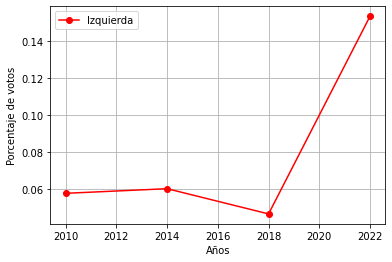

In [ ]:
plt.plot(years, matrixTotal['IZQUIERDA'], '-o', c='red', label='Izquierda')

plt.grid()
plt.legend()
plt.xlabel('Años')
plt.ylabel('Porcentaje de votos')
plt.savefig('drive/MyDrive/Proyecto2_CienciaDatos/images/YearsVsIzq.svg', dpi=200)

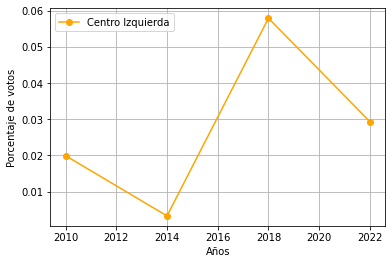

In [ ]:
plt.plot(years, matrixTotal['CENTRO-IZQUIERDA'], '-o', c='orange', label='Centro Izquierda')

plt.grid()
plt.legend()
plt.xlabel('Años')
plt.ylabel('Porcentaje de votos')
plt.savefig('drive/MyDrive/Proyecto2_CienciaDatos/images/YearsVsCentIzq.svg', dpi=200)

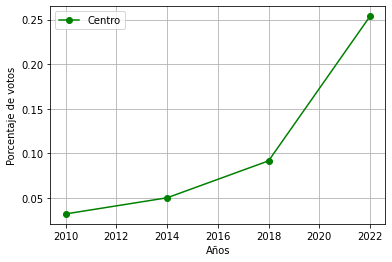

In [ ]:
plt.plot(years, matrixTotal['CENTRO'], '-o', c='green', label='Centro')
plt.grid()
plt.legend()
plt.xlabel('Años')
plt.ylabel('Porcentaje de votos')
plt.savefig('drive/MyDrive/Proyecto2_CienciaDatos/images/YearsVsCent.svg', dpi=200)

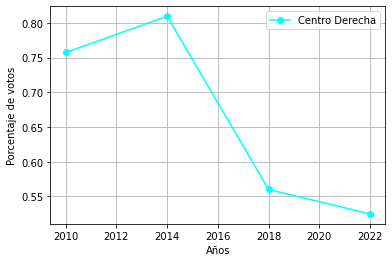

In [ ]:
plt.plot(years, matrixTotal['CENTRO-DERECHA'], '-o', c='cyan', label='Centro Derecha')

plt.grid()
plt.legend()
plt.xlabel('Años')
plt.ylabel('Porcentaje de votos')
plt.savefig('drive/MyDrive/Proyecto2_CienciaDatos/images/YearsVsCentDer.svg', dpi=200)

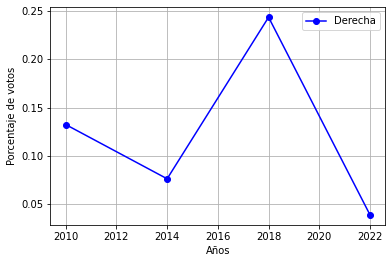

In [ ]:
plt.plot(years, matrixTotal['DERECHA'], '-o', c='blue', label='Derecha')

plt.grid()
plt.legend()
plt.xlabel('Años')
plt.ylabel('Porcentaje de votos')
plt.savefig('drive/MyDrive/Proyecto2_CienciaDatos/images/YearsVsDer.svg', dpi=200)